# __Generation of stochastic DFNs__

### Problem statement
The fractured system in a rock mass is conceptualized as a population of individual fractures, each defined by a set of geometrical properties (e.g. position, size and orientation for a disc-shaped fracture, etc.). 
<br>
We here define fracture geometries in terms of statistical distributions and generate, in a  stochastic process, fractures conditioned to these distributions.

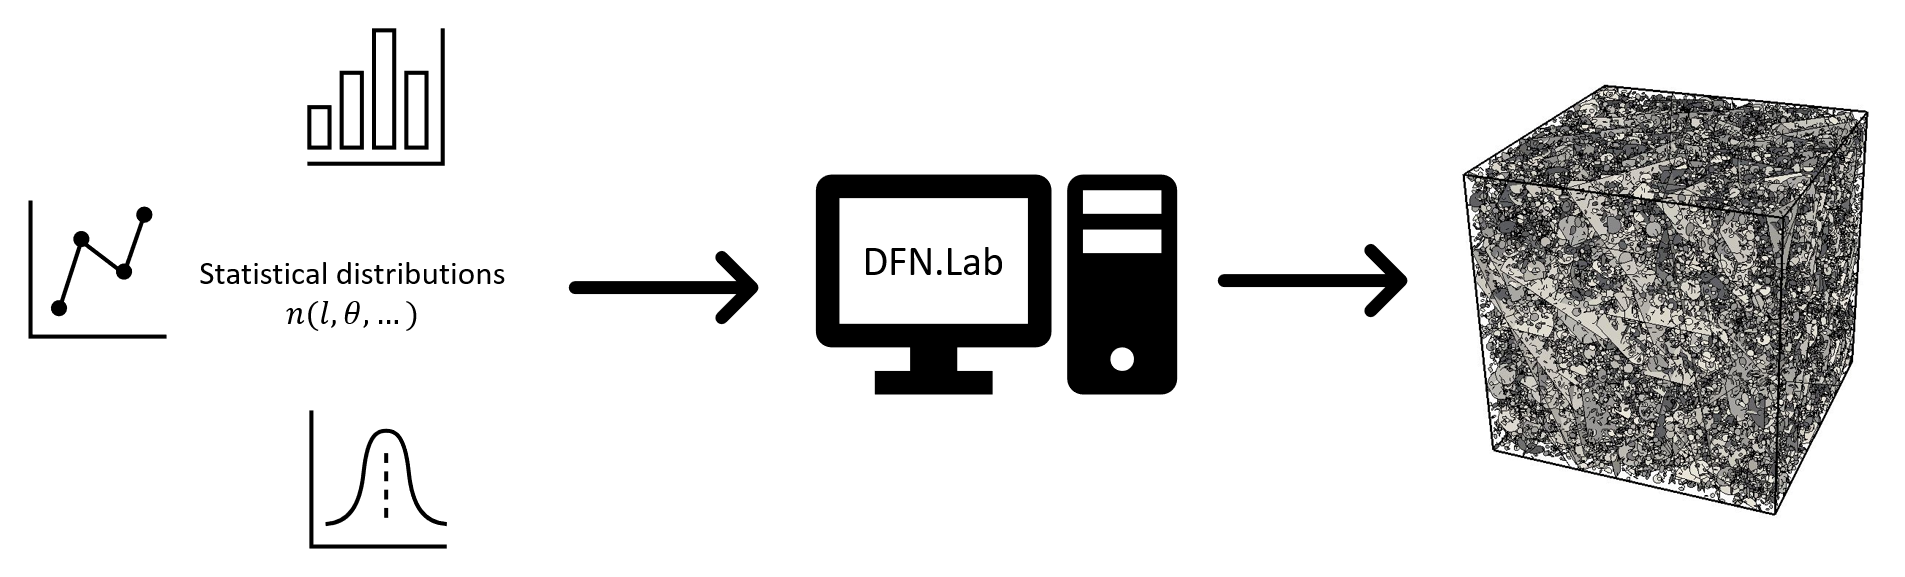
<center>
From statistical distributions of fracture geometrical properties to DFN realizations
</center>
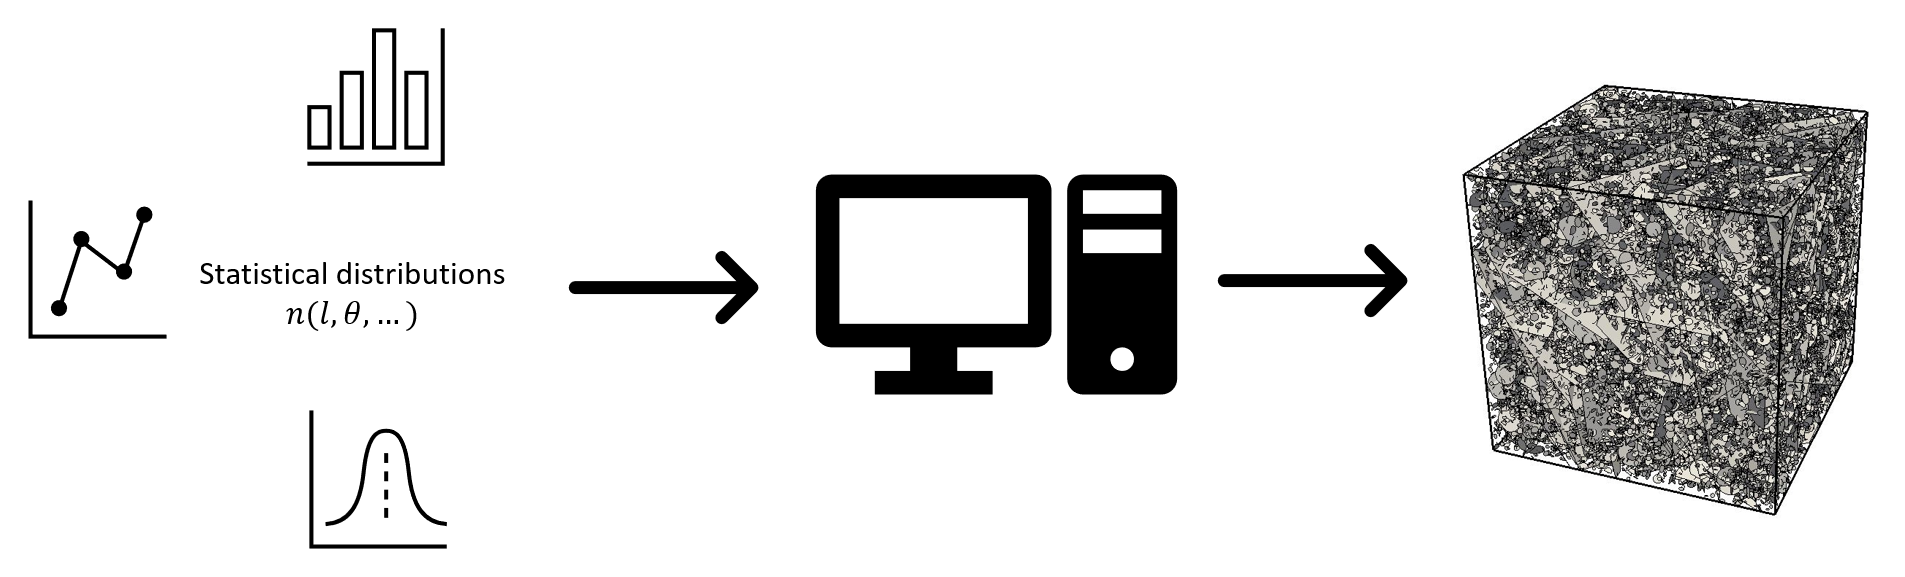

### Theoretical background
Basic knowledge of statistical distributions is required for using stochastic DFN generation.
<br>
The most simple case is to generate fracture positions from a Poisson point process, either based on a uniform or fractal spatial density distribution [_[Darcel et al, 2003]_](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2002WR001628).
<br>
Fractures may be uniformly oriented or defined by an orientation distribution (e.g. [Fisher](https://www.rocscience.com/help/swedge/swedge/Fisher_Distribution.htm)), and their sizes may follow various multiscale distributions (power-law, exponential...)


### What will you learn ?
- How to define a stochastic DFN model. This includes at least fracture position, size, and orientation distributions
- An insight to currently supported distributions in DFN.Lab

### DFN.Lab model

In the three examples given here, we define stochastic DFN models and generate fractures, using one or several realizations in a cubic domain of size 100 units.

The required modules are __Generator__ and __Basis__.
<br>
We use [_pyvista_](https://docs.pyvista.org) for embedded visualization in our notebook.
<br>
We use [_matplotlib_](https://matplotlib.org) and [_mplstereonet_](https://github.com/joferkington/mplstereonet) to construct plots.
<br>
Plot functions are implemented in [Tutorials/sources/functions.py](https://gitlab.com/fractorylab/dfnlab/-/blob/new_tutos/Tutorials/sources/functions.py).

_____________

## Example 1: DFN with constant size and uniform orientations

We generate a DFN of 20000 fractures with constant fracture size (10 units) and uniformly random (i.e isotropic) orientations.
<br>
The location of each fracture is independent of any other fracture and their fracture positions (centroids) are uniform within the model volume (so called Poissonian distribution).

In [1]:
%reset -f

import dfnlab.Basis as basis
import dfnlab.Generator as generator
import os 

We first create a spatial domain object “the_system” which is the volume within which we intend to generate the DFN. 
<br>
Thereafter, we create an empty DFN “fnet” which is linked to the domain "the_system”. 

In [2]:
the_system = basis.System()
the_system.buildParallelepiped(center=[0, 0, 0], L1=100.)
fnet = basis.DFN(the_system)

The DFN statistical model is initialized in a generator object.<br>
The _generate_ command launches the generation process: fractures are generated in the domain based on a Poisson point process, until the target criteria (fracture number below) is reached.

In [3]:
pgenerator = generator.PoissonGenerator(fnet, seed=1001)
pgenerator.setSizesUniform(lmin=10, lmax=10)
pgenerator.setPositionsUniform()
pgenerator.setOrientationsUniform()
pgenerator.setStopNumber(20000)
pgenerator.generate();

We visualize the network. 

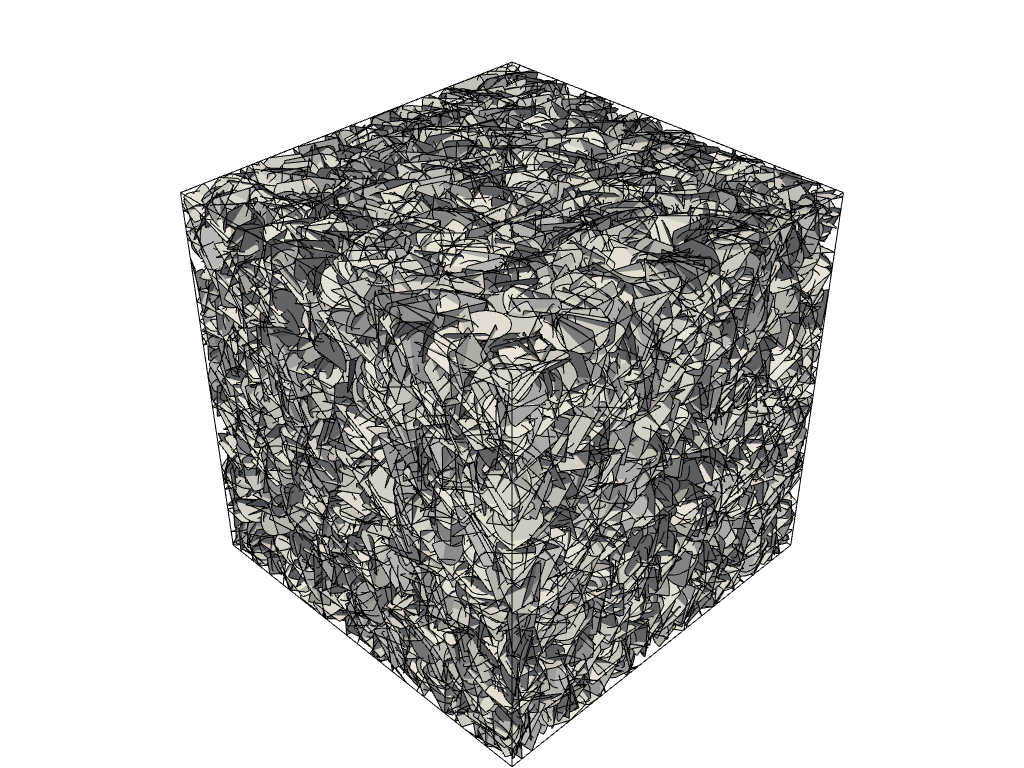

In [4]:
from sources.functions import plot_dfn

path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
    
plot_dfn(fnet,pathFolder+"/tuto2_dfn1")

_____________

## Example 2: DFN with power-law size distribution and Fisher orientations

In this example, the fracture size distribution is a power-law over a size range from 1 to 100 units, with a scaling exponent of 3.
<br>
The location of each fracture centroïd follows a Poissonian distribution.
<br>
We create two independent fracture groups with different mean orientations (according to Fisher orientation distributions) and intensities (0.1 units<sup>-1</sup>  and 0.2 units<sup>-1</sup>).
<br>
Thus, the generation process is divided in two. Each time, we halt fracture generation when the total fracture intensity is reached. 


In [5]:
%reset -f

import dfnlab.Basis as basis
import dfnlab.Generator as generator
import os 

the_system = basis.System()
the_system.buildParallelepiped(center=[0, 0, 0], L1=100.,L2=100.,L3=100.)
fnet = basis.DFN(the_system)


pgenerator = generator.PoissonGenerator(fnet,seed=1001)
pgenerator.setSizesPowerlaw(a=3., lmin=1, lmax=100)
pgenerator.setPositionsUniform()

pgenerator.setOrientationsFisher(dip=45, dipd=90, kappa= 15) 
pgenerator.setStopDensity(0.1)
pgenerator.generate()

pgenerator.setOrientationsFisher(dip=45, dipd=270., kappa= 15)
pgenerator.setStopDensity(0.3) 
pgenerator.generate();

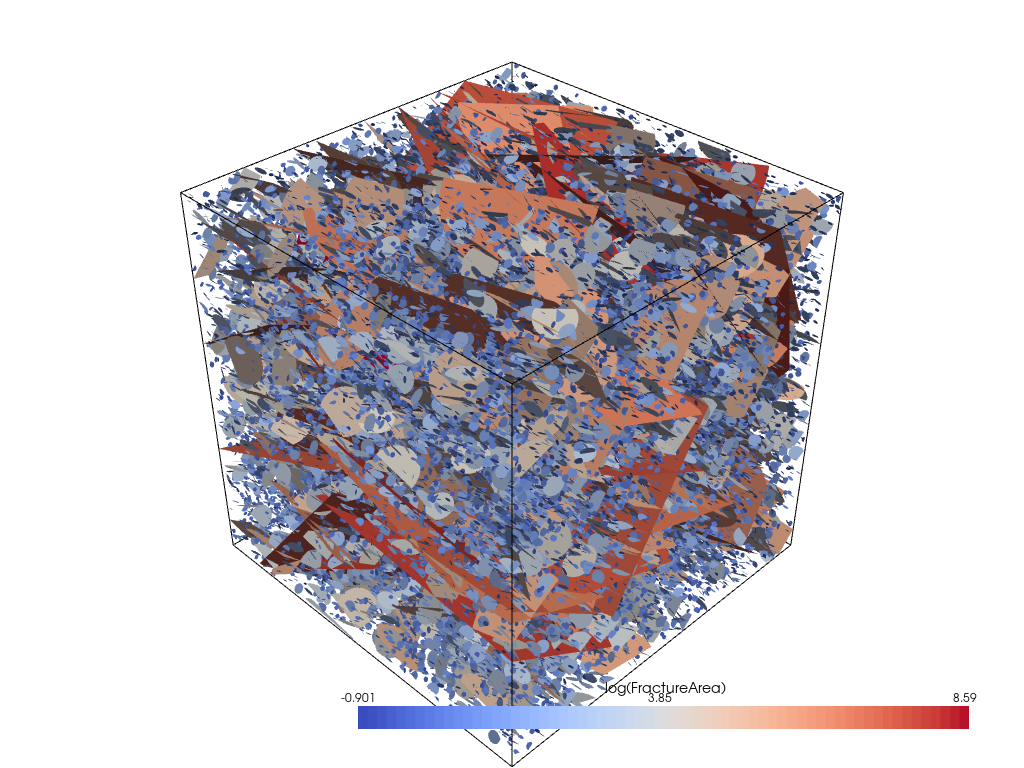

In [6]:
from sources.functions import plot_dfn

path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
    
plot_dfn(fnet,pathFolder+"/tuto2_dfn2",value="FractureArea",log=True)

We plot the fracture size distribution below.

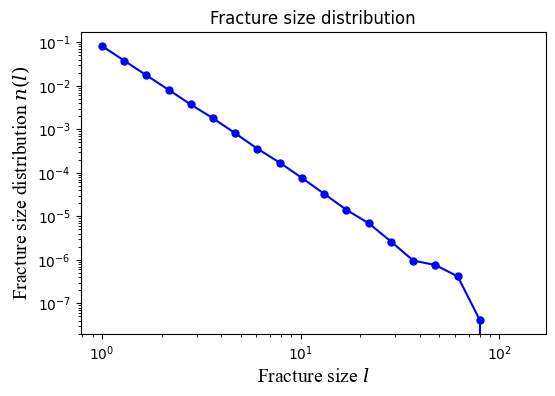

In [7]:
from sources.functions import plot_size_distribution
%matplotlib inline

plot_size_distribution(fnet)

The stereonet plotted below reflects the characteristics expected from the 2 Fisher's distributions used to define the orientation model.

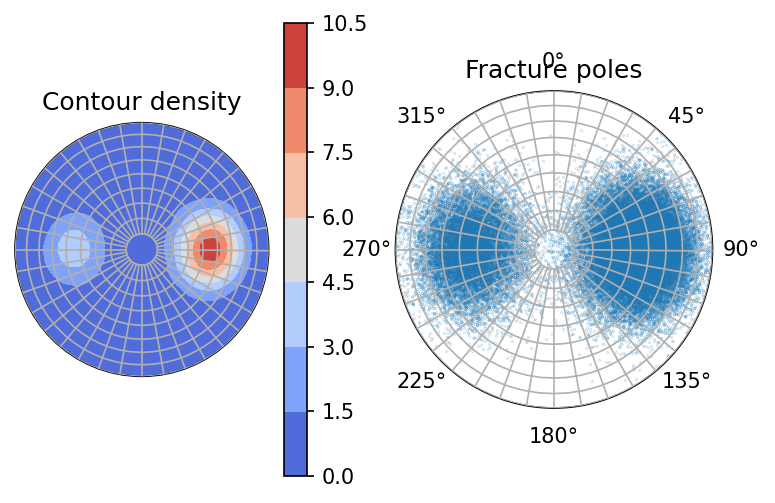

In [8]:
from sources.functions import plot_stereonet
%matplotlib inline

plot_stereonet(fnet)

_____________

## Example 3: DFN with fractal positioning of fractures

In this example, fracture positions are defined as a fractal point process, defined by a correlation dimension $D_c$ and a refinement depth _nbIterations_.

In [9]:
%reset -f

import dfnlab.Basis as basis
import dfnlab.Generator as generator
import os 

the_system = basis.System()
the_system.buildParallelepiped(center=[0, 0, 0], L1=100.)
fnet = basis.DFN(the_system)

pgenerator = generator.PoissonGenerator(fnet,seed=1001)
pgenerator.setSizesPowerlaw(a=3.,lmin=1.,lmax=100)
pgenerator.setPositionsFractal(Dc=2.7,nbIterations=6)
pgenerator.setOrientationsUniform()
pgenerator.setStopNumber(10000)
pgenerator.generate();

We can visualize the network.

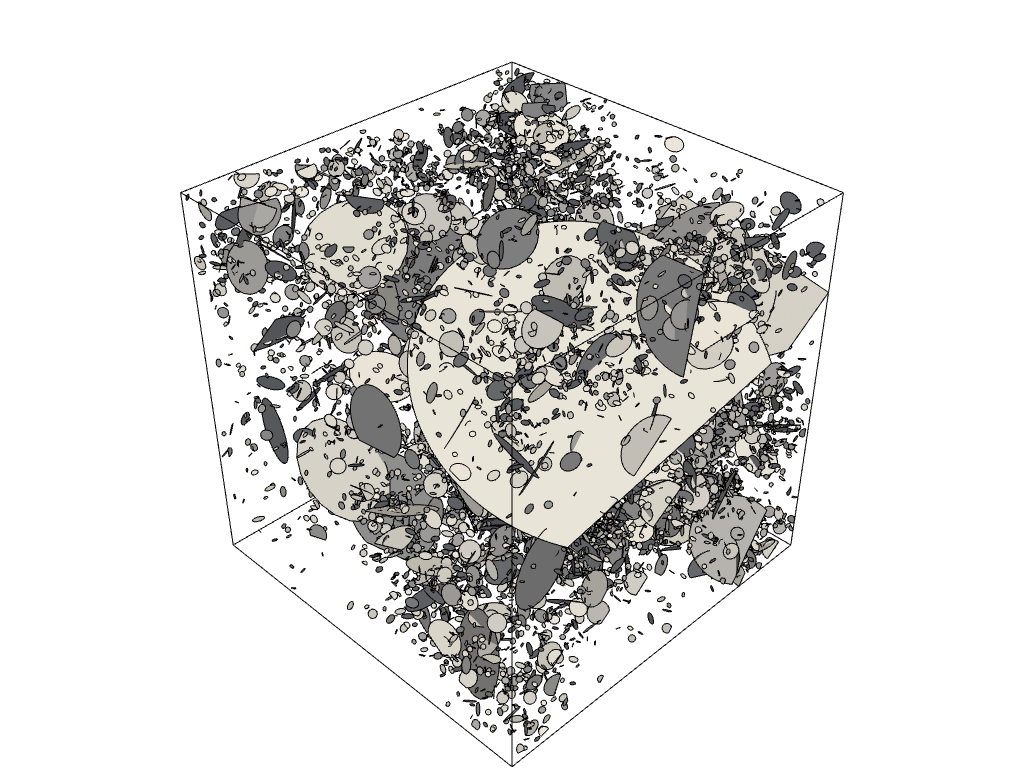

In [10]:
from sources.functions import plot_dfn

path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
    
plot_dfn(fnet,pathFolder+"/tuto2_dfn3")

We can compare output and input metrics to check how well the generated DFN honors the statistical conditioning. 
<br>
Here we plot the derivative of the correlation pair function of fracture centers (to evaluate the output fractal dimension of the DFN).

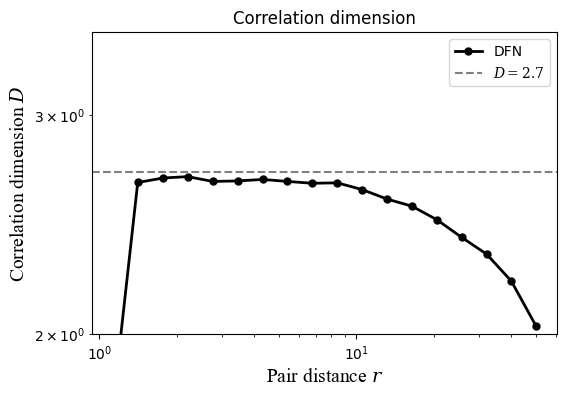

In [11]:
from sources.functions import plot_correlation_pair_function
%matplotlib inline

plot_correlation_pair_function(fnet,2.7)

One can see that the obtained correlation dimension match the target one, when considering reasonable pair distances (border effects are visible when pair distance is bigger thant 10).